In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
Ride_df=pd.read_csv("rideshare_pricing_data.csv")

In [3]:
Ride_df

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,distance,drivers_available,ride_requests,peak_hour,temperature,precipitation,visibility,event_nearby,price
0,40.874540,-74.126359,41.229998,-73.861855,1.065366,13,46,0,27.385724,0,9.542978,0,26.010994
1,41.450714,-74.167088,40.684512,-74.040708,0.298857,40,64,0,20.378497,1,6.355968,0,15.600458
2,41.231994,-74.323846,40.846640,-73.535501,0.405258,10,31,0,18.313723,1,10.682139,0,10.756709
3,41.098658,-73.892733,41.163281,-74.281022,0.597809,28,41,0,37.013580,0,8.508607,0,21.057554
4,40.656019,-74.023376,40.982089,-73.912144,0.683162,30,53,1,-14.801414,0,9.589979,1,23.649685
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,-73.622961,41.452275,-73.745966,2.922119,23,12,0,22.132327,0,9.083888,0,15.899768
9996,41.397509,-74.453186,41.247824,-73.735473,0.769301,38,99,0,3.413087,0,9.393715,0,10.884197
9997,41.446708,-74.196302,40.519456,-74.230431,4.146848,14,75,0,17.223095,0,10.957781,0,19.121226
9998,40.897488,-74.056680,40.901005,-74.065680,2.208232,38,86,0,12.792122,0,12.144354,0,12.990045


In [7]:
Ride_df.drop(["pickup_latitude", "pickup_longitude", "dropoff_latitude","dropoff_longitude" ],axis=1,inplace=True)

In [8]:
Ride_df.dropna(inplace=True)

In [9]:
Ride_df["distance"] = Ride_df["distance"].apply(lambda X: round(X,2))

In [10]:
Ride_df


,distance,drivers_available,ride_requests,peak_hour,temperature,precipitation,visibility,event_nearby,price
0,1.07,13,46,0,27.385724,0,9.542978,0,26.010994
1,0.30,40,64,0,20.378497,1,6.355968,0,15.600458
2,0.41,10,31,0,18.313723,1,10.682139,0,10.756709
3,0.60,28,41,0,37.013580,0,8.508607,0,21.057554
4,0.68,30,53,1,-14.801414,0,9.589979,1,23.649685
...,...,...,...,...,...,...,...,...,...
9995,2.92,23,12,0,22.132327,0,9.083888,0,15.899768
9996,0.77,38,99,0,3.413087,0,9.393715,0,10.884197
9997,4.15,14,75,0,17.223095,0,10.957781,0,19.121226
9998,2.21,38,86,0,12.792122,0,12.144354,0,12.990045


In [11]:
Ride_df["temperature"] = Ride_df["temperature"].astype(int)
Ride_df["price"]=Ride_df["price"].astype(int)
Ride_df["visibility"]=Ride_df["visibility"].astype(int)

In [12]:
Ride_df

,distance,drivers_available,ride_requests,peak_hour,temperature,precipitation,visibility,event_nearby,price
0,1.07,13,46,0,27,0,9,0,26
1,0.30,40,64,0,20,1,6,0,15
2,0.41,10,31,0,18,1,10,0,10
3,0.60,28,41,0,37,0,8,0,21
4,0.68,30,53,1,-14,0,9,1,23
...,...,...,...,...,...,...,...,...,...
9995,2.92,23,12,0,22,0,9,0,15
9996,0.77,38,99,0,3,0,9,0,10
9997,4.15,14,75,0,17,0,10,0,19
9998,2.21,38,86,0,12,0,12,0,12


In [13]:
Ride_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9500 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   distance           9500 non-null   float64
 1   drivers_available  9500 non-null   int64  
 2   ride_requests      9500 non-null   int64  
 3   peak_hour          9500 non-null   int64  
 4   temperature        9500 non-null   int64  
 5   precipitation      9500 non-null   int64  
 6   visibility         9500 non-null   int64  
 7   event_nearby       9500 non-null   int64  
 8   price              9500 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 742.2 KB


In [5]:
Ride_df["pickup"] = list(zip(Ride_df["pickup_latitude"], Ride_df["pickup_longitude"]))

In [6]:
Ride_df["Dropoff"] = list(zip(Ride_df["dropoff_latitude"], Ride_df["dropoff_longitude"]))

In [7]:
Ride_df.drop(columns=["pickup_latitude", "pickup_longitude", "dropoff_latitude", "dropoff_longitude"], axis=1, inplace=True)

In [8]:
Pickup_col=Ride_df.pop("pickup")
Ride_df.insert(0,"pickup",Pickup_col)

In [9]:
Drop_col=Ride_df.pop("Dropoff")
Ride_df.insert(1,"Dropoff",Drop_col)

In [10]:
Ride_df

,pickup,Dropoff,distance,drivers_available,ride_requests,peak_hour,temperature,precipitation,visibility,event_nearby,price
0,"(40.87454011884736, -74.1263591815333)","(41.22999831098997, -73.86185543162783)",1.065366,13,46,0,27.385724,0,9.542978,0,26.010994
1,"(41.45071430640992, -74.1670879037686)","(40.68451199559871, -74.04070754646581)",0.298857,40,64,0,20.378497,1,6.355968,0,15.600458
2,"(41.2319939418114, -74.32384608749715)","(40.84663969436989, -73.53550147513606)",0.405258,10,31,0,18.313723,1,10.682139,0,10.756709
3,"(41.09865848419704, -73.89273332989852)","(41.16328063685782, -74.28102154901576)",0.597809,28,41,0,37.013580,0,8.508607,0,21.057554
4,"(40.65601864044244, -74.02337583949137)","(40.98208934452448, -73.91214358400106)",0.683162,30,53,1,-14.801414,0,9.589979,1,23.649685
...,...,...,...,...,...,...,...,...,...,...,...
9994,"(40.62461420770752, -73.59896150226598)","(40.76931649510577, -73.575299841736)",1.675627,46,76,0,4.058622,0,13.135812,1,26.611317
9996,"(41.397508835108354, -74.45318604276578)","(41.24782421118497, -73.73547306431806)",0.769301,38,99,0,3.413087,0,9.393715,0,10.884197
9997,"(41.44670791503389, -74.19630153087105)","(40.51945586281455, -74.23043056823066)",4.146848,14,75,0,17.223095,0,10.957781,0,19.121226
9998,"(40.89748799242263, -74.05667999352092)","(40.901004842483374, -74.06568022779837)",2.208232,38,86,0,12.792122,0,12.144354,0,12.990045


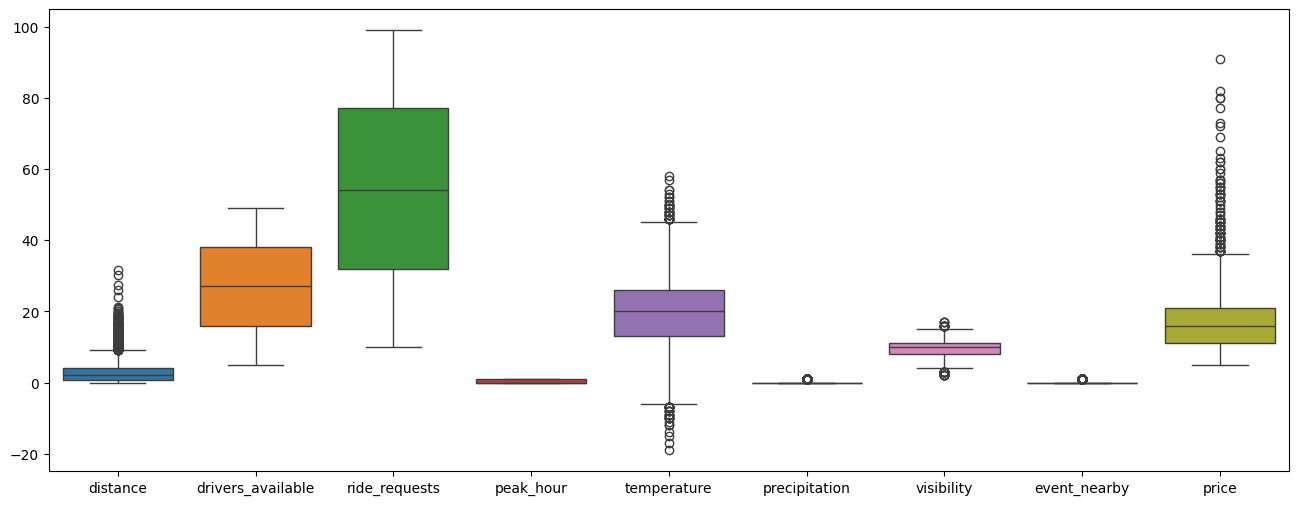

In [14]:
plt.figure(figsize=(16,6))
sns.boxplot(Ride_df)
plt.show()

distance


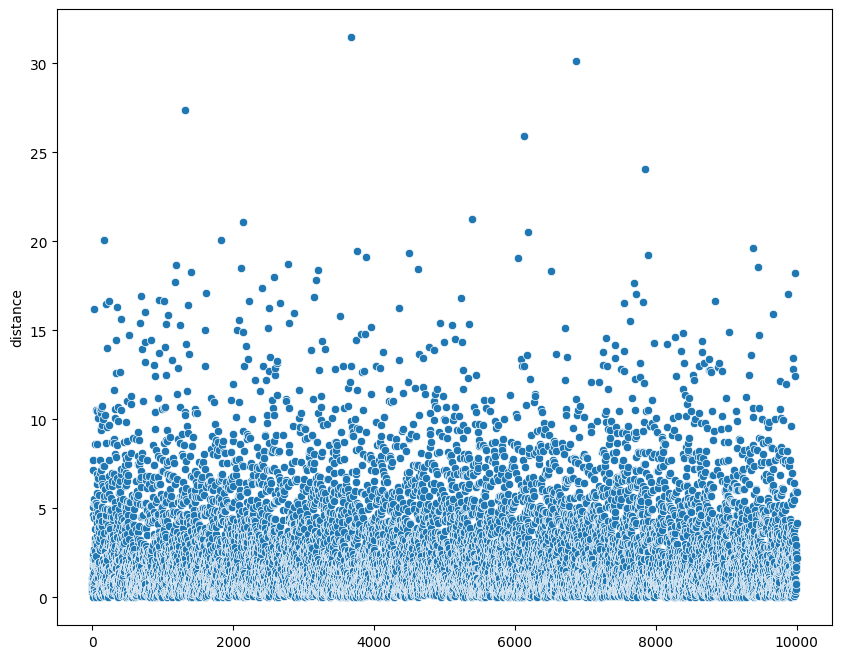

drivers_available


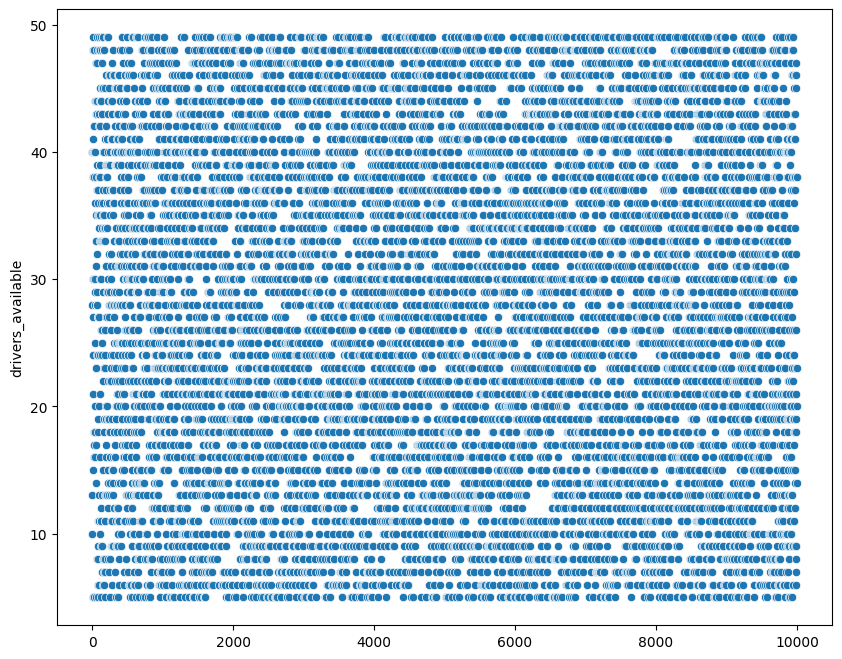

ride_requests


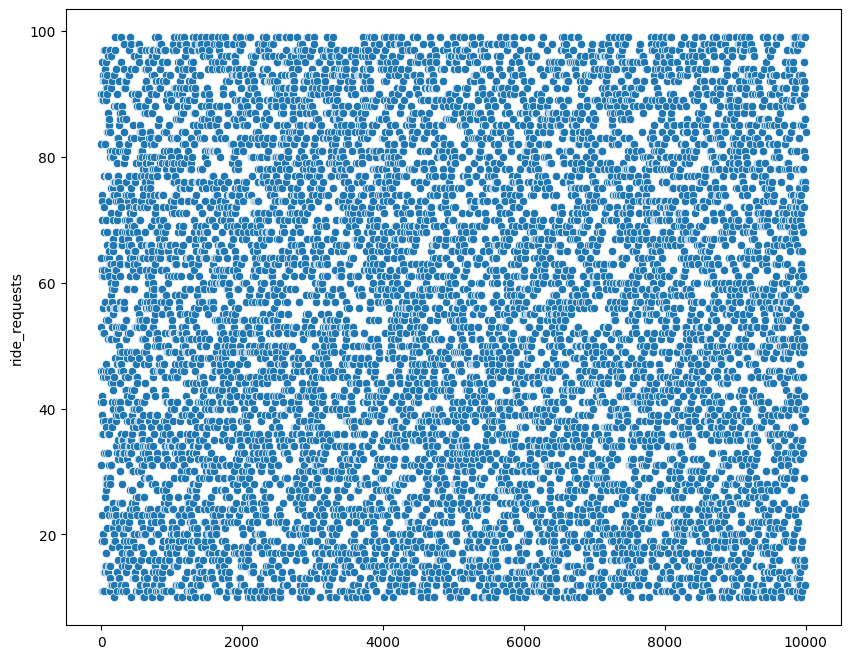

peak_hour


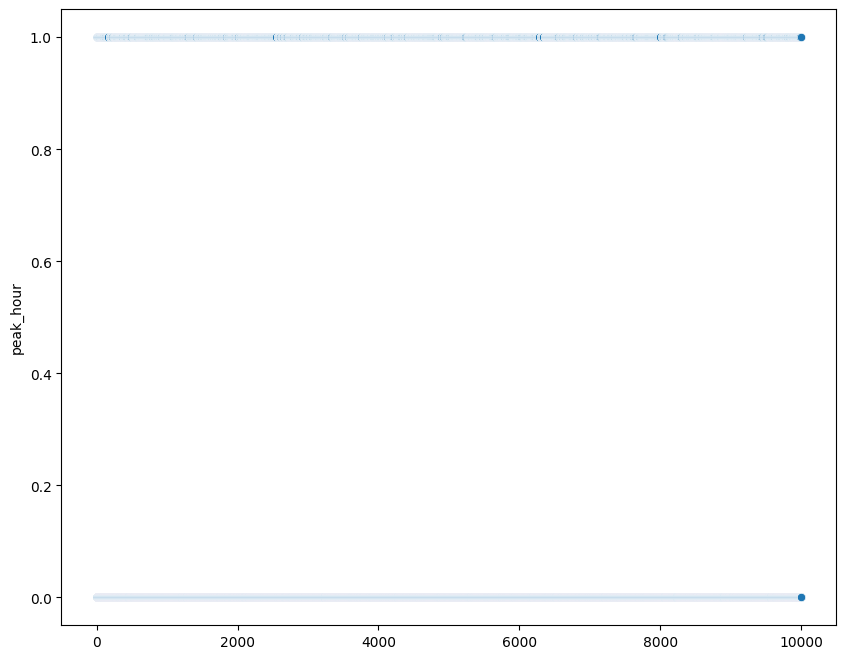

temperature


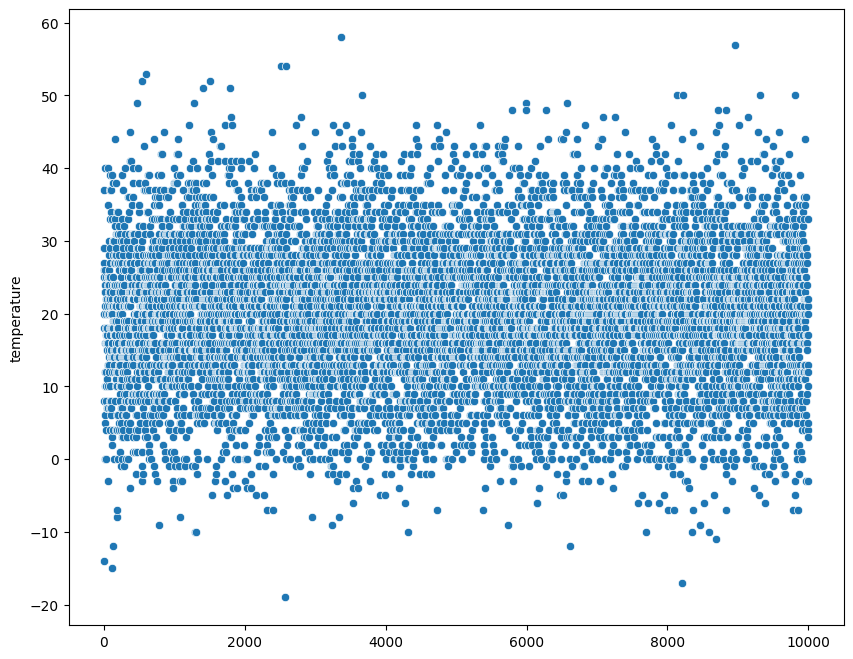

precipitation


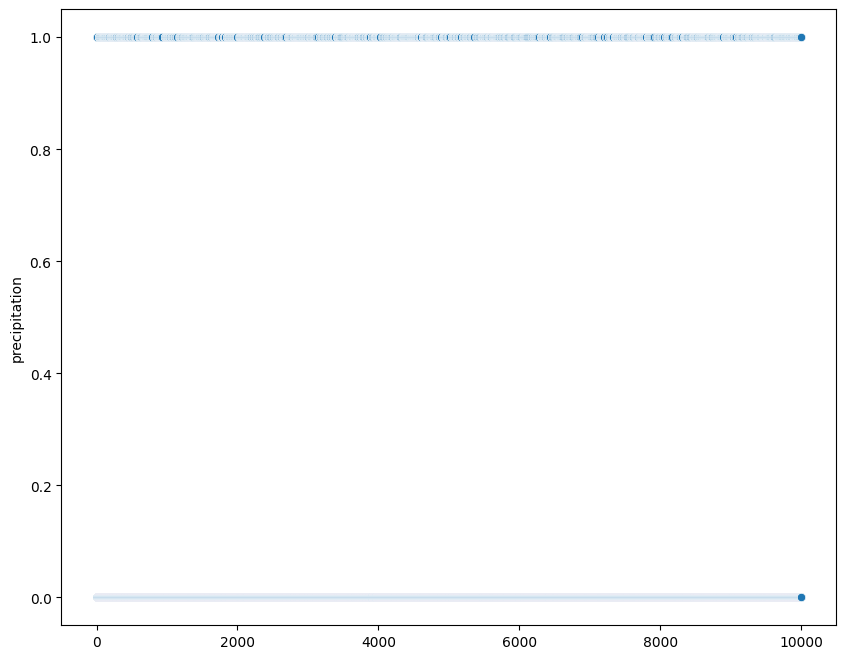

visibility


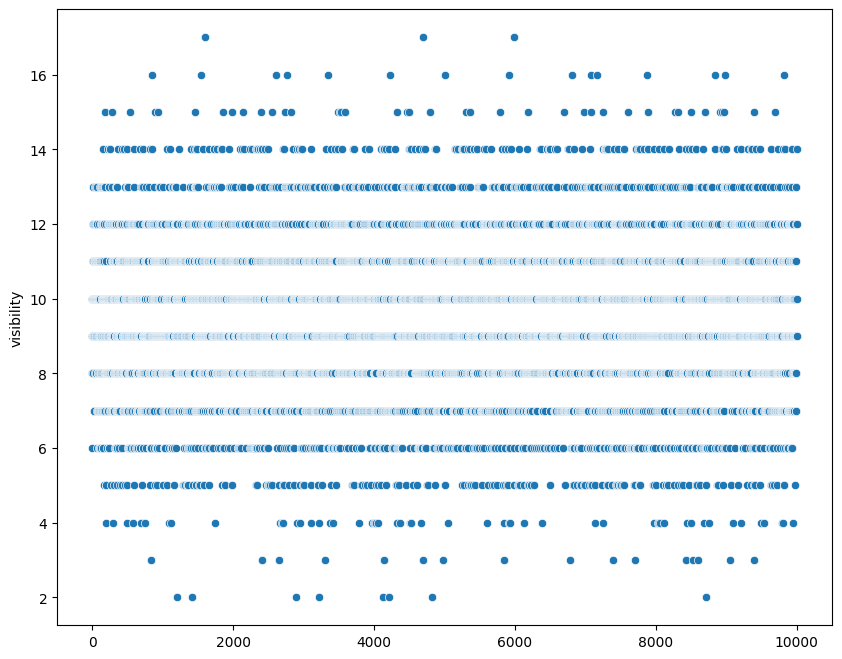

event_nearby


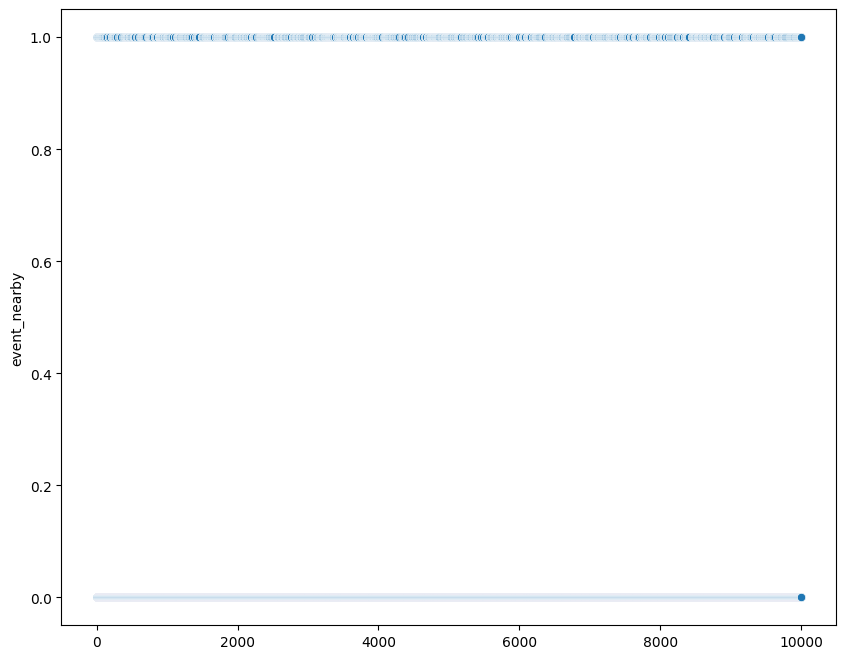

price


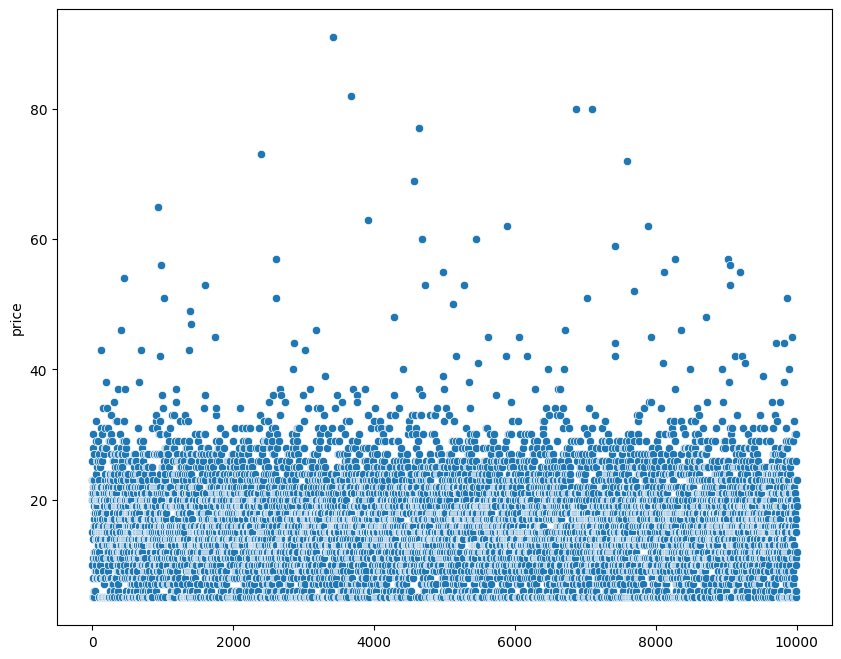

In [15]:
for i in Ride_df.columns:
    if Ride_df[i].dtype !="object":
       print(i)
       plt.figure(figsize=(10,8))
       sns.scatterplot(Ride_df[i])
       plt.show()

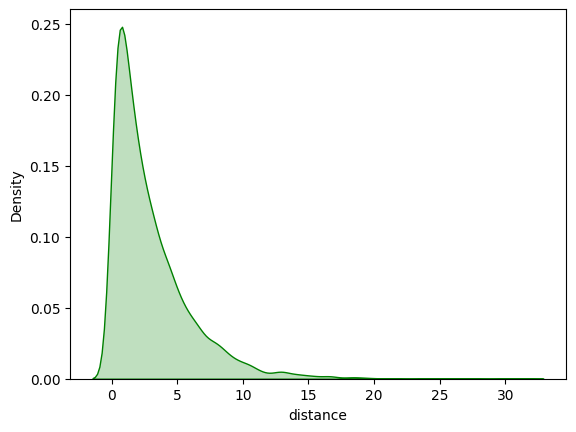

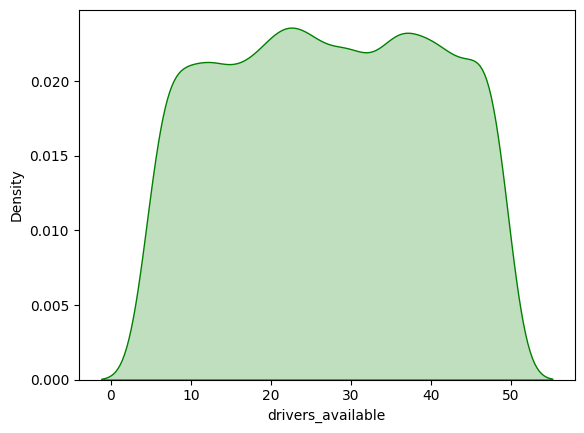

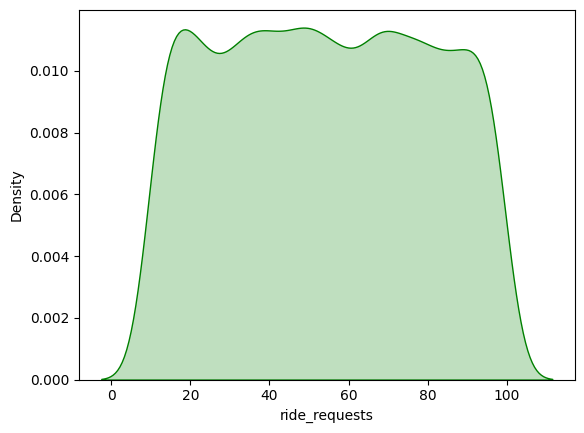

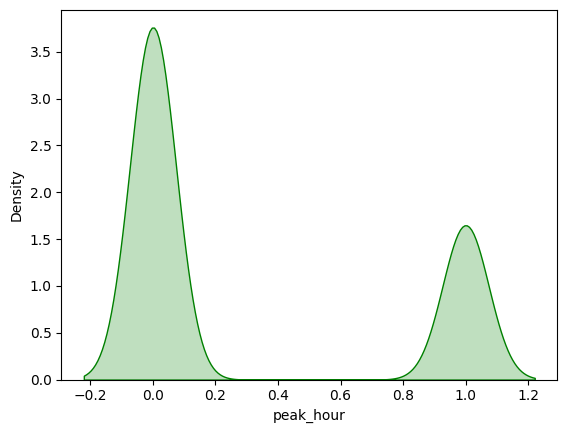

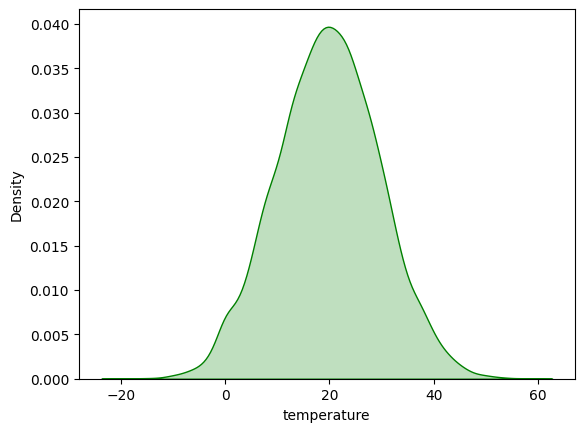

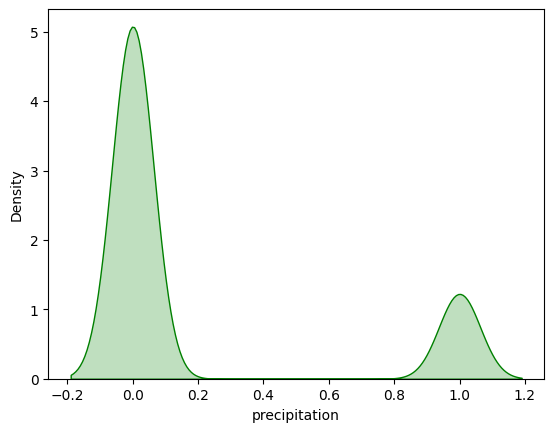

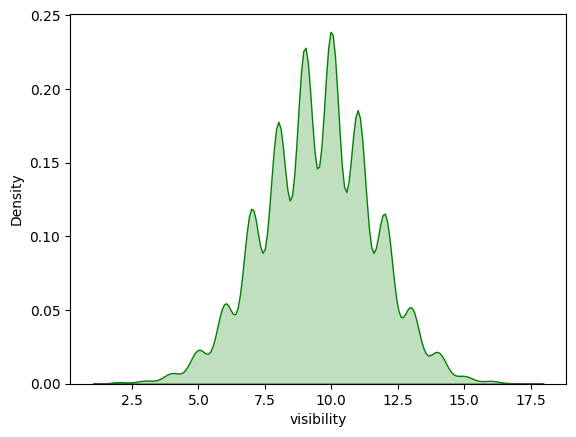

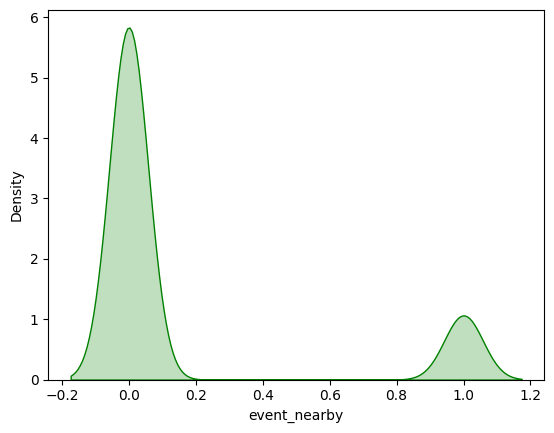

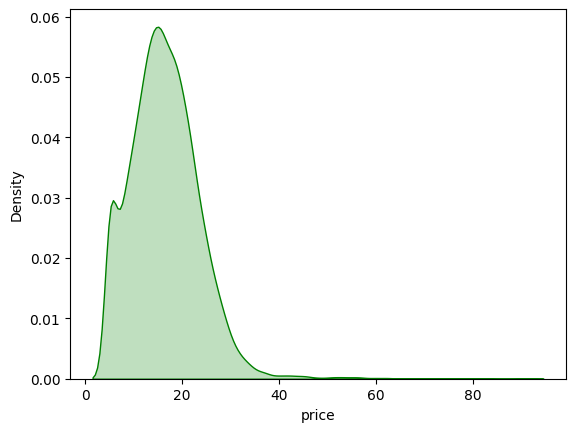

In [16]:
for i in Ride_df.columns:
    if Ride_df[i].dtype != 'object' :
        sns.kdeplot(Ride_df[i],fill=True,color="g"), "warn_Singular=false"
        plt.show()

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score

In [19]:
features = Ride_df.drop(['price'], axis = 1)
target = Ride_df['price']

In [20]:
model = RandomForestRegressor(n_estimators=20,random_state=40)
model.fit(features,target)

RandomForestRegressor(n_estimators=20, random_state=40)

In [21]:
model.feature_importances_

array([0.22864546, 0.14364311, 0.24759153, 0.09275942, 0.13202349,
       0.02323776, 0.07757364, 0.0545256 ])

In [22]:
feature_importance = pd.DataFrame({
    "column": features.columns,
    "Score": model.feature_importances_ *100
}).sort_values('Score',ascending=False)
feature_importance

,column,Score
2,ride_requests,24.759153
0,distance,22.864546
1,drivers_available,14.364311
4,temperature,13.202349
3,peak_hour,9.275942
6,visibility,7.757364
7,event_nearby,5.452560
5,precipitation,2.323776


In [23]:
x = Ride_df.drop(['price'],axis = 1)
y = Ride_df['price']
print(x.shape)
x

(9500, 8)


,distance,drivers_available,ride_requests,peak_hour,temperature,precipitation,visibility,event_nearby
0,1.07,13,46,0,27,0,9,0
1,0.30,40,64,0,20,1,6,0
2,0.41,10,31,0,18,1,10,0
3,0.60,28,41,0,37,0,8,0
4,0.68,30,53,1,-14,0,9,1
...,...,...,...,...,...,...,...,...
9995,2.92,23,12,0,22,0,9,0
9996,0.77,38,99,0,3,0,9,0
9997,4.15,14,75,0,17,0,10,0
9998,2.21,38,86,0,12,0,12,0


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 50)

In [25]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7600, 8), (1900, 8), (7600,), (1900,))

In [26]:
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor(criterion = 'squared_error',n_estimators=700 ,max_depth = 25, min_samples_split = 7, min_samples_leaf = 5, random_state=50)
model_RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=25, min_samples_leaf=5, min_samples_split=7,
                      n_estimators=700, random_state=50)

In [27]:
y_pred_test = model_RF.predict(x_test)
y_pred_train = model_RF.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

3.066279831512752
4.377321771636628
0.6303289437319268
0.31789581457089644


In [28]:
from sklearn.tree import DecisionTreeRegressor
model_DT = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 400, min_samples_split = 10, min_samples_leaf = 7, random_state=50)
model_DT.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=400, min_samples_leaf=7, min_samples_split=10,
                      random_state=50)

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

y_pred_test = model_DT.predict(x_test)
y_pred_train = model_DT.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

3.4296442957627167
5.128470327917696
0.5633527245807275
0.09312841244709502


In [30]:
from sklearn.ensemble import GradientBoostingRegressor
model_GB = GradientBoostingRegressor(n_estimators=400, max_depth=10, min_samples_split=7, learning_rate=0.01)
model_GB.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=10, min_samples_split=7,
                          n_estimators=400)

In [31]:
y_pred_test = model_GB.predict(x_test)
y_pred_train = model_GB.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

2.439753172129186
4.549172882905205
0.8008768368818713
0.25768813411215097


In [32]:
import pickle

with open('GradientBoost_model.pkl', 'wb') as file:
    pickle.dump(model_GB,file)

In [33]:
Ride_df.to_csv("New_Ride", index=False)

In [34]:
df=pd.read_csv('New_Ride')

In [35]:
df

,distance,drivers_available,ride_requests,peak_hour,temperature,precipitation,visibility,event_nearby,price
0,1.07,13,46,0,27,0,9,0,26
1,0.30,40,64,0,20,1,6,0,15
2,0.41,10,31,0,18,1,10,0,10
3,0.60,28,41,0,37,0,8,0,21
4,0.68,30,53,1,-14,0,9,1,23
...,...,...,...,...,...,...,...,...,...
9495,2.92,23,12,0,22,0,9,0,15
9496,0.77,38,99,0,3,0,9,0,10
9497,4.15,14,75,0,17,0,10,0,19
9498,2.21,38,86,0,12,0,12,0,12
